# KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import numpy as np
from math import sqrt
from collections import Counter

def KNN_classify(k:int,X_train:np.array,y_train:np.array,x:np.array):
    assert 1<=k <=X_train.shape[0]
    assert X_train.shape[0] == y_train.shape[0]
    assert X_train.shape[1] == x.shape[0]
    distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
    res = np.argsort(distances)
    topK_y = [y_train[i] for i in res[:k]]
    votes = Counter(topK_y)
    return votes.most_common(1)[0][0]

In [3]:
import numpy as np
from math import sqrt
from collections import Counter


class KNNClassifier:
    def __init__(self, k: int):
        assert k >= 1
        self.k = k
        self.train_x = None
        self.train_y = None

    def fit(self, X_train: np.array, y_train: np.array):
        assert self.k <= X_train.shape[0]
        assert X_train.shape[0] == y_train.shape[0]
        self.train_x = X_train
        self.train_y = y_train

    def __knn_classify(self, x: np.array) -> int:
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self.train_x]
        res = np.argsort(distances)
        topK_y = [self.train_y[i] for i in res[:self.k]]
        votes = Counter(topK_y)
        return votes.most_common(1)[0][0]

    def predict(self, x: np.array) -> np.array:
        assert self.train_x is not None and self.train_y is not None
        assert self.train_x.shape[1] == x.shape[0] or self.train_x.shape[1] == x.shape[1]
        if len(x.shape) == 2:
            res = np.array([self.__knn_classify(i) for i in x])
        else:
            res = np.array([self.__knn_classify(x)])
        return res


In [26]:
max_data, size = 10, 10
raw_data_X = [np.random.random(2)*max_data for _ in range(size)]
raw_data_y = []
for i in raw_data_X:
    if sqrt(i[0]**2+i[1]**2) < max_data*0.75:
        raw_data_y.append(0)
    else:
        raw_data_y.append(1)
train_X = np.array(raw_data_X)
train_y = np.array(raw_data_y)

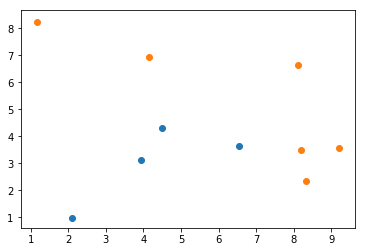

In [27]:
plt.scatter(train_X[train_y == 0,0],train_X[train_y == 0,1])
plt.scatter(train_X[train_y == 1,0],train_X[train_y == 1,1])
plt.show()

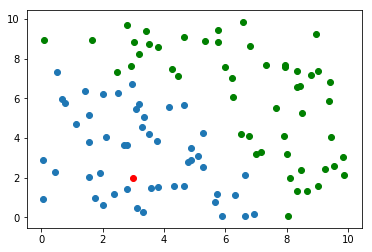

0

In [21]:
test_x = np.random.random(2) * max_data
plt.scatter(train_X[train_y == 0,0], train_X[train_y == 0,1])
plt.scatter(train_X[train_y == 1,0], train_X[train_y == 1,1], color = "g")
plt.scatter(test_x[0], test_x[1],color = "r")
plt.show()
predict = KNN_classify(6, train_X, train_y, test_x)
predict

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
KNN_classifier = KNeighborsClassifier(n_neighbors= 6 )

In [9]:
KNN_classifier.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [10]:
KNN_classifier.predict(test_x.reshape((1,-1)))

array([1])

In [11]:
classifier = KNNClassifier(6)

In [12]:
classifier.fit(train_X,train_y)

In [13]:
classifier.predict(test_x)

array([1])

In [31]:
allres = {}

In [69]:
counter = 0
n = 10000
classifier = KNNClassifier(6)
classifier.fit(train_X,train_y)
for i in range(n):
    test_x = np.random.random(2) * max_data
    if sqrt(test_x[0]**2+test_x[1]**2) < max_data*0.75:
        res = 0
    else:
        res = 1
    Knn_res = classifier.predict(test_x)
    if res == Knn_res:
        counter+=1
r = counter / n
print(r)
if not allres.get(size) or allres[size] < r:
    allres[size] = r

0.9923


In [38]:
for x in range(10,1000,5):
    max_data, size = 10, x
    raw_data_X = [np.random.random(2)*max_data for _ in range(size)]
    raw_data_y = []
    for i in raw_data_X:
        if sqrt(i[0]**2+i[1]**2) < max_data*0.75:
            raw_data_y.append(0)
        else:
            raw_data_y.append(1)
    train_X = np.array(raw_data_X)
    train_y = np.array(raw_data_y)
    n = 1000
    classifier = KNNClassifier(6)
    classifier.fit(train_X,train_y)
    for j in range(5):
        counter = 0
        for i in range(n):
            test_x = np.random.random(2) * max_data
            if sqrt(test_x[0]**2+test_x[1]**2) < max_data*0.75:
                res = 0
            else:
                res = 1
            Knn_res = classifier.predict(test_x)
            if res == Knn_res:
                counter+=1
        r = counter / n
        if not allres.get(size) or allres[size] < r:
            allres[size] = r
    if size % 20 == 0:
        print("size: "+ str(size) +", ratio: " + str(allres[size]))

size: 20, ratio: 0.941
size: 40, ratio: 0.974
size: 60, ratio: 0.957
size: 80, ratio: 0.98
size: 100, ratio: 0.975
size: 120, ratio: 0.987
size: 140, ratio: 0.986
size: 160, ratio: 0.966
size: 180, ratio: 0.981
size: 200, ratio: 0.987
size: 220, ratio: 0.985
size: 240, ratio: 0.992
size: 260, ratio: 0.987
size: 280, ratio: 0.99
size: 300, ratio: 0.986
size: 320, ratio: 0.987
size: 340, ratio: 0.987
size: 360, ratio: 0.989
size: 380, ratio: 0.983
size: 400, ratio: 0.995
size: 420, ratio: 0.988
size: 440, ratio: 0.992
size: 460, ratio: 0.991
size: 480, ratio: 0.987
size: 500, ratio: 0.986
size: 520, ratio: 0.993
size: 540, ratio: 0.996
size: 560, ratio: 0.989
size: 580, ratio: 0.991
size: 600, ratio: 0.99
size: 620, ratio: 0.991
size: 640, ratio: 0.992
size: 660, ratio: 0.985
size: 680, ratio: 0.988
size: 700, ratio: 0.994
size: 720, ratio: 0.996
size: 740, ratio: 0.986
size: 760, ratio: 0.987
size: 780, ratio: 0.993
size: 800, ratio: 0.991
size: 820, ratio: 0.993
size: 840, ratio: 0.991

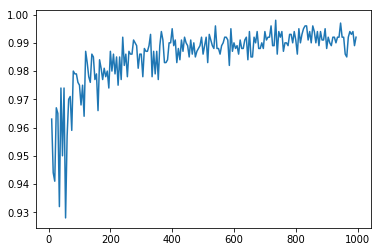

In [62]:
keys = list(allres.keys())
keys.sort()
res = np.array([[i,allres[i]] for i in keys])
plt.plot(res[:,0],res[:,1])
plt.show()

In [66]:
import pickle
with open("KNN_RES_LIST","wb") as f:
    pickle.dump(res, f)

In [ ]:
with open("KNN_RES_DICT","wb") as f:
    pickle.dump(allres, f)

In [173]:
from sklearn import datasets
iris = datasets.load_iris()
X = np.hstack([iris.data,iris.target.reshape(-1,1)])
np.random.shuffle(X)
X,y = np.hsplit(X,[-1])
y = y.reshape(-1)
test_ratio = 0.2
size = len(X) - int(test_ratio * len(X))
X,test_x = np.vsplit(X,[size])
y,test_y = y[:size],y[size:]

In [174]:
Knn = KNeighborsClassifier(6)
Knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [175]:
res = Knn.predict(test_x)
np.sum(res == test_y)/len(res)

0.9666666666666667

In [185]:
%%timeit
from sklearn import datasets
iris = datasets.load_iris()
X = np.hstack([iris.data,iris.target.reshape(-1,1)])
np.random.shuffle(X)
X,y = np.hsplit(X,[-1])
y = y.reshape(-1)
test_ratio = 0.2
size = len(X) - int(test_ratio * len(X))
X,test_x = np.vsplit(X,[size])
y,test_y = y[:size],y[size:]
Knn = KNeighborsClassifier(6)
Knn.fit(X,y)
res = Knn.predict(test_x)
np.sum(res == test_y)/len(res)

4.72 ms ± 231 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [183]:
%%timeit
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
shuffule_indexes = np.random.permutation(len(X))
test_ratio = 0.2
size = len(X)  - int(test_ratio * len(X))
train_indexes, test_indexes = shuffule_indexes[:size],shuffule_indexes[size:]
Knn = KNeighborsClassifier(6)
Knn.fit(X[train_indexes], y[train_indexes])
res = Knn.predict(X[test_indexes])
np.sum(res == y[test_indexes]) / len(res)

4.93 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [243]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
shuffule_indexes = np.random.permutation(len(X))
test_ratio = 0.2
size = len(X)  - int(test_ratio * len(X))
train_indexes, test_indexes = shuffule_indexes[:size],shuffule_indexes[size:]
Knn = KNNClassifier(6)
Knn.fit(X[train_indexes], y[train_indexes])
res = Knn.predict(X[test_indexes])
np.sum(res == y[test_indexes]) / len(res)

0.9333333333333333

In [195]:
def train_test_split(X: np.ndarray, y: np.ndarray, ratio=0.2, seed=None):
    assert X.shape[0] == y.shape[0]
    assert 0.0 <= ratio <= 1.0
    if seed:
        np.random.seed(seed)
    shuffle_indexes = np.random.permutation(len(X))
    size = len(X) - int(ratio * len(X))
    train_indexes, test_indexes = shuffle_indexes[:size], shuffle_indexes[size:]
    return X[train_indexes], y[train_indexes], X[test_indexes], y[test_indexes]